In [ ]:
pip install transformers torch numpy beautifulsoup4 requests

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoTokenizer, AutoModel

# Simple Embedding Model using pretrained model DistilBERT
class SimpleEmbeddingModel(nn.Module):
    def __init__(self, model_name="distilbert-base-uncased"):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)

    def forward(self, texts):
        tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
        inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
        outputs = self.encoder(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1)
        return embeddings

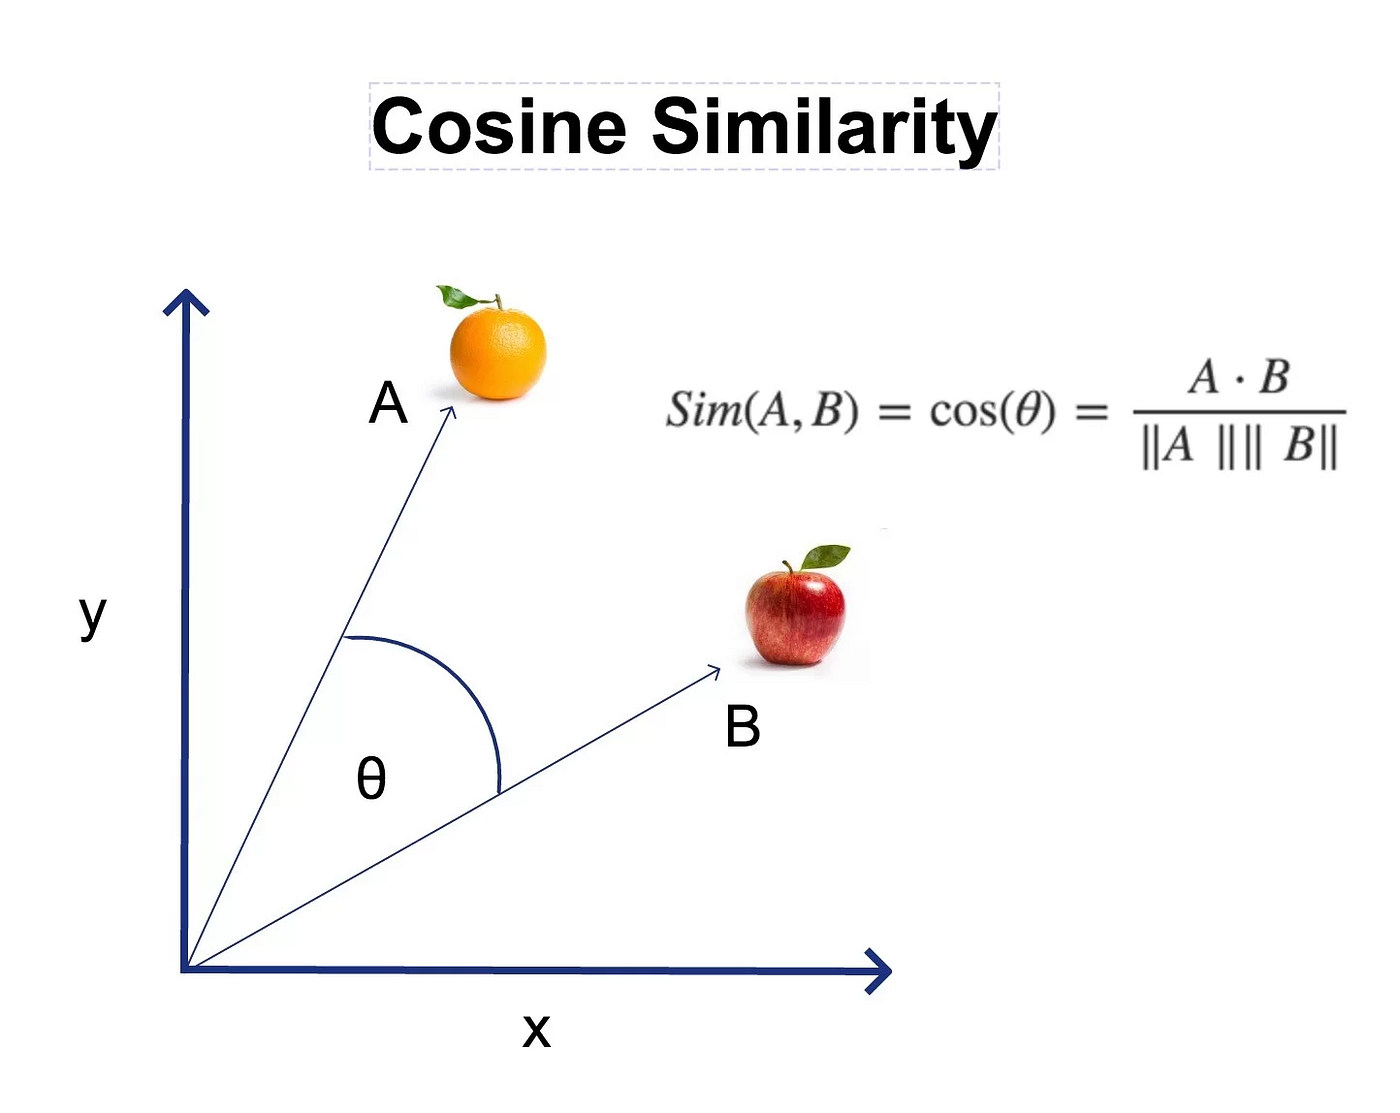

In [ ]:
import numpy as np

def cosine_similarity(a, b):

  a_np = a.detach().numpy()
  b_np = b.detach().numpy()

  return np.dot(a_np, b_np) / (np.linalg.norm(a_np) * np.linalg.norm(b_np))

model = SimpleEmbeddingModel()

# Try ["A small sad boy", "A little unhappy kid"] - semantically similar sentences --> high cosine similarity score
# Try ["He ran for an hour", "Rice University is in Houston"] - semantically different sentences --> low cosine similarity score
texts = ["A small sad boy", "A little unhappy kid"]
embeddings = model(texts)



sim = cosine_similarity(embeddings[0], embeddings[1])
print("Similarity:", sim)

In [ ]:
import requests
from bs4 import BeautifulSoup # we use BeatifulSoup for webscraping
term = "202610" #2025-2026 course catalog


url_schedule = "https://courses.rice.edu/admweb/!SWKSCAT.cat?p_action=CATALIST&p_term=202510" # scrape data from courses.rice.edu

# Get the HTML code of the page
resp = requests.get(url_schedule)
html_source = resp.text

soup = BeautifulSoup(html_source, "html.parser") # our scraper

schedule_data = []

for row in soup.select("tr"): # iterate through each table row <tr>
    cells = row.find_all("td") # get all table data <td> cells in current table row
    if len(cells) > 4: # skip rows that don't have enough cells (header or blank rows)
        schedule_data.append({
            "course": cells[0].text.strip(),
            "title": cells[1].text.strip(),
            "distribution_group": cells[2].text.strip(),
            "diversity_credit": cells[3].text.strip() != "",
            "credit_hours": cells[4].text.strip(),
        })

In [ ]:
for data in schedule_data:
    print(data)